# Learning
1. kNN classifier : how it works? Create data ans labels and apply knn to make prediction on unseen data.
2.  ( Histogram of gradient)HOG is a way of extracting features from images.
3. Demo on different problems: multiclass and binary problem.

# Setup

In [1]:
import sys
assert sys.version_info >=(3,7)

import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

# How kNN works

The prediction: [[1.]]
The labels of neighbours: [[1. 1. 0.]]
The squared distance: [[169. 452. 793.]]


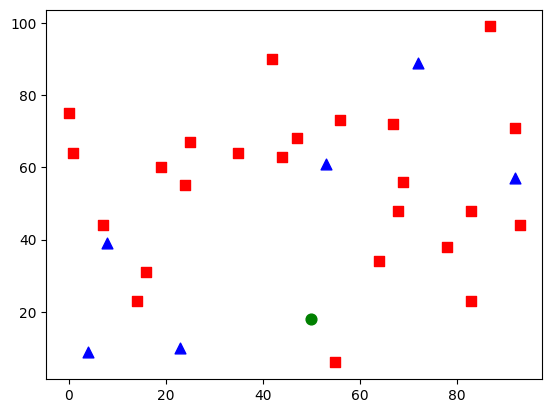

In [2]:
np.random.seed(7)

#generate (randomly bivariate sample from uniform distribution [0-99])
train_data = np.random.randint(0, 100, size = (30, 2)).astype(np.float32)
targets = np.random.randint(0, 2, size = (30, 1)).astype(np.float32)

#subset the data based on the targets
datA = train_data[targets.ravel()==0]
plt.scatter(datA[:, 0], datA[:, 1],marker="^", c="b", s=60)

datB = train_data[targets.ravel()==1]
plt.scatter(datB[:, 0], datB[:, 1],marker="s", c="r", s=60)

#sample a new data
new_data = np.random.randint(0, 100, size = (1, 2)).astype(np.float32)
plt.scatter(new_data[:, 0], new_data[:, 1],marker="o", c="g", s=60)

# create a kNN object (OpenCV function)
knn = cv.ml.KNearest_create()
knn.train(train_data, cv.ml.ROW_SAMPLE, targets)
ret, pred, label_neigh, sq_dist = knn.findNearest(new_data, 3)


print(f"The prediction: {pred}")
print(f"The labels of neighbours: {label_neigh}")
print(f"The squared distance: {sq_dist}")

plt.show()

In [3]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\celin\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
knn = KNeighborsClassifier(n_neighbors = 3, n_jobs=-1)
knn.fit(train_data, targets.flatten())
print(f"The prediction: {knn.predict(new_data)}")

The prediction: [1.]


In [6]:
knn.kneighbors(new_data)

(array([[13.        , 21.26029163, 28.16025568]]),
 array([[11, 17, 28]], dtype=int64))

In [7]:
dist, idx_neigh = knn.kneighbors(new_data)

targets[idx_neigh]

array([[[1.],
        [1.],
        [0.]]], dtype=float32)

## fashion mnist data classification with kNN

In [8]:
sys.path

['C:\\Users\\celin\\UCCC2513\\Week 10',
 'C:\\Users\\celin\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip',
 'C:\\Users\\celin\\AppData\\Local\\Programs\\Python\\Python311\\DLLs',
 'C:\\Users\\celin\\AppData\\Local\\Programs\\Python\\Python311\\Lib',
 'C:\\Users\\celin\\AppData\\Local\\Programs\\Python\\Python311',
 '',
 'C:\\Users\\celin\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages',
 'C:\\Users\\celin\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\win32',
 'C:\\Users\\celin\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\win32\\lib',
 'C:\\Users\\celin\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\Pythonwin']

In [9]:
sys.path.insert(1, 'C:/Users/celin/UCCC2513/Week 10/fashion-mnist-master/utils')

In [10]:
import mnist_reader

X_train, y_train = mnist_reader.load_mnist('./fashion-mnist-master/fashion-mnist-master/data/fashion', kind="train")
X_test, y_test = mnist_reader.load_mnist('./fashion-mnist-master/fashion-mnist-master/data/fashion', kind="t10k")

In [11]:
X_train.shape # 28 * 28

(60000, 784)

In [12]:
X_test.shape

(10000, 784)

In [13]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [14]:
class_labels = ["t-shirt", "trouser", "pullover", "dress", "coat","sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [15]:
X_train.dtype

dtype('uint8')

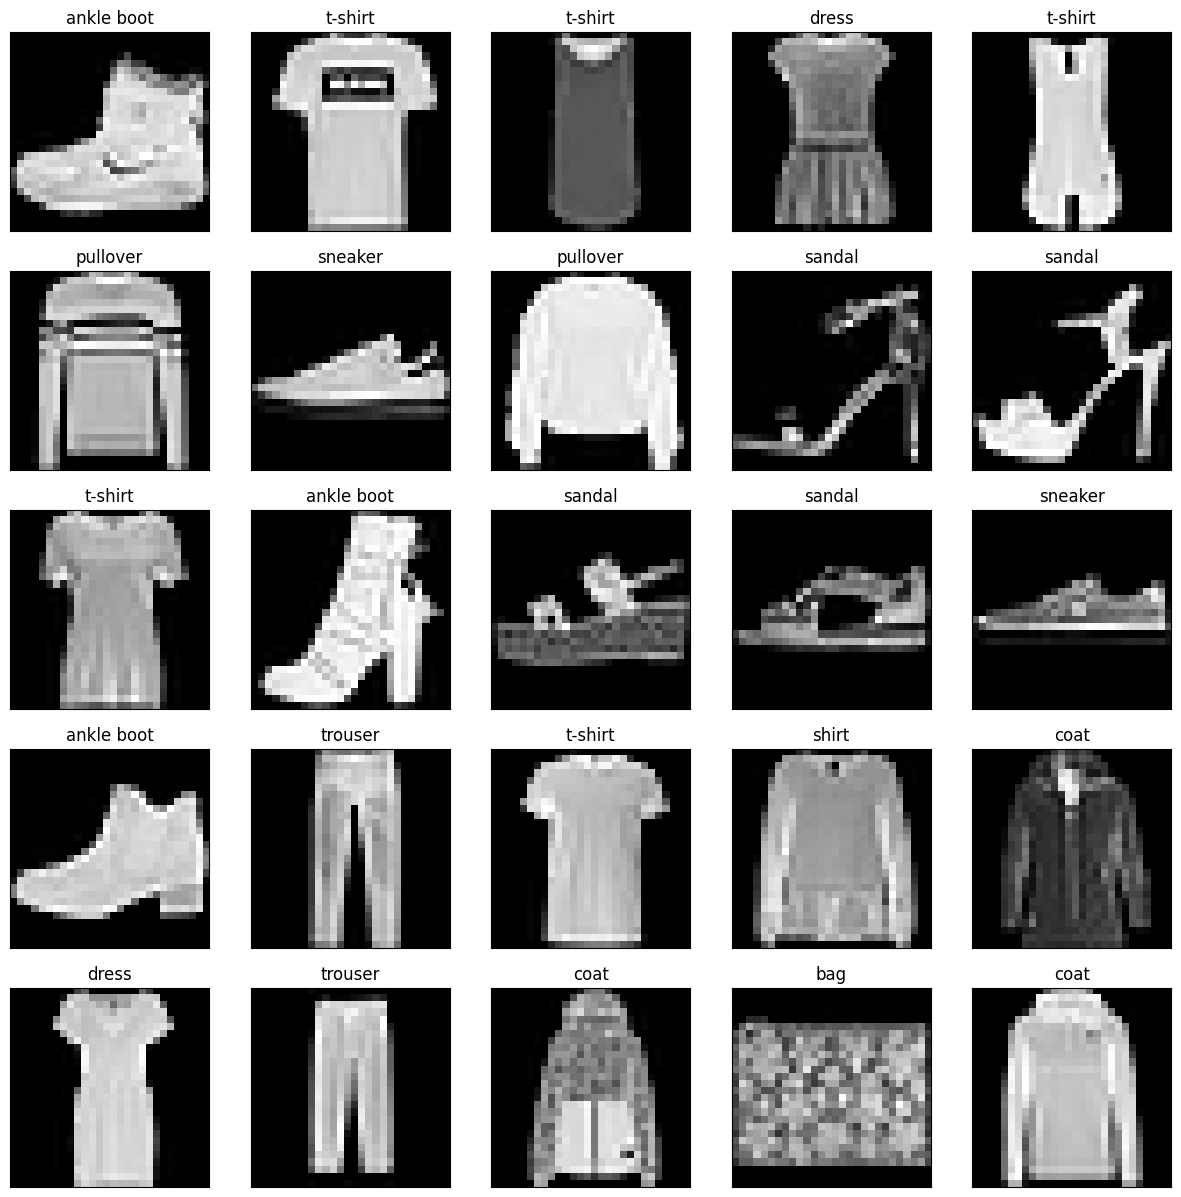

In [16]:
# Visualization
plt.figure(figsize=(15, 15))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i].reshape((28, 28)), cmap = plt.cm.gray)
    plt.xticks([]), plt.yticks([])
    plt.title(class_labels[y_train[i]])
    
plt.show()

In [17]:
# preprocessing. bot necessary because the range has been standardized to (0-255)
np.random.seed(100)
shuffled_idx = np.random.permutation(len(X_train))
n_sample = int(0.1*len(X_train))
X_train_part = X_train[shuffled_idx[:n_sample]]
y_train_part = y_train[shuffled_idx[:n_sample]]

In [18]:
X_train_part.shape

(6000, 784)

In [19]:
from sklearn.model_selection import cross_val_score    #k-fold CV accuracy

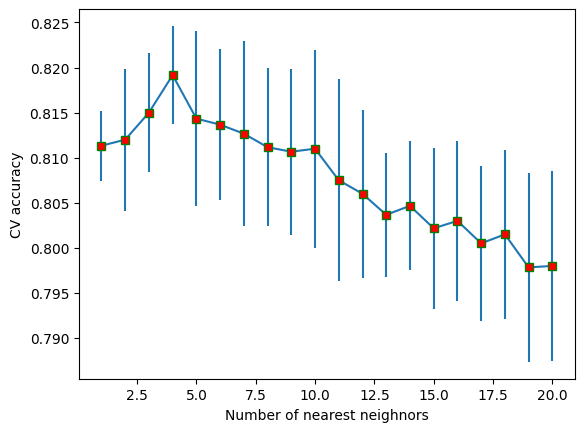

In [20]:
k_list = np.arange(1,21)

mean_acc = []
std_acc = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs = -1)
    scores = cross_val_score(knn, X_train_part, y_train_part)
    mean_acc.append(scores.mean())
    std_acc.append(scores.std())
    
plt.errorbar(k_list, mean_acc,std_acc, marker = "s", mec = "g", mfc = "r")
plt.xlabel("Number of nearest neighnors")
plt.ylabel("CV accuracy")
plt.show()

In [21]:
import time

In [22]:
k_opt = k_list[np.argmax(mean_acc)]

start = time.time()
# retrain the knn with all the train data
knn = KNeighborsClassifier(n_neighbors=k_opt, n_jobs=-1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(f"The execution time of training and prediction:{(time.time() - start):.3f}s.")

The execution time of training and prediction:19.843s.


In [23]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [24]:
print(classification_report(y_test, pred, target_names= class_labels))

              precision    recall  f1-score   support

     t-shirt       0.75      0.89      0.81      1000
     trouser       0.99      0.97      0.98      1000
    pullover       0.71      0.83      0.76      1000
       dress       0.90      0.87      0.89      1000
        coat       0.80      0.74      0.77      1000
      sandal       0.99      0.85      0.92      1000
       shirt       0.68      0.55      0.60      1000
     sneaker       0.88      0.97      0.93      1000
         bag       0.98      0.95      0.97      1000
  ankle boot       0.92      0.96      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



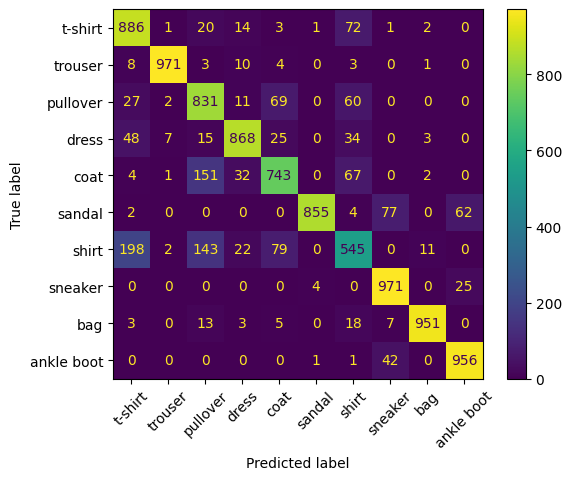

In [25]:
conf_mat = confusion_matrix(y_test, pred)
conf_mat_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=class_labels)

conf_mat_display.plot()
plt.xticks(rotation = 45)
plt.show()

In [26]:
#each class will sum up to 1000
#shirt class (row prespective)
res = 198 + 143 + 79 + 545 + 11 + 2 + 22
print(res)

1000


In [27]:
conf_mat[:, -4].sum()  # 804 is shirt correct: 545/804 = 67.8% (precision)

# recall : True Positive (correctness of the machine learning)
# precision :  Correctly predicted by the machine

804

## cats vs dogs classification

In [28]:
# create classes that can preprocess and load the data
class dataPreprocessor:
    def __init__(self, width, height, inter=cv.INTER_AREA):
        self.width = width
        self.height = height
        self.inter = inter
        
    def process(self, img):
        return cv.resize(img, (self.width, self.height), interpolation=self.inter)

In [29]:
class dataLoader:
    def __init__(self, preprocessor=None):
        self.preprocessor = preprocessor
        
        # need to load thru all existing preprocessor
        if self.preprocessor is None:
            self.preprocessor = []
            
    def load(self, imgPath):
        data = []
        labels = []
        
        for imgName in os.listdir(imgPath):
            filePath = os.path.join(imgPath, imgName)
            img = cv.imread(cv.samples.findFile(filePath))
            label = imgName.split(".")[0]
            
            if self.preprocessor is not None:
                for p in self.preprocessor:
                    img = p.process(img)
                    
            data.append(img)
            labels.append(label)
            
        return np.array(data), np.array(labels)

In [30]:
dataPrep = dataPreprocessor(64, 64)
dataLoad = dataLoader(preprocessor=[dataPrep])
X, y = dataLoad.load("./cats_vs_dogs_small")

In [31]:
X.shape

(3000, 64, 64, 3)

In [32]:
os.listdir("./cats_vs_dogs_small")

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.1001.jpg',
 'cat.1002.jpg',
 'cat.1003.jpg',
 'cat.1004.jpg',
 'cat.1005.jpg',
 'cat.1006.jpg',
 'cat.1007.jpg',
 'cat.1008.jpg',
 'cat.1009.jpg',
 'cat.101.jpg',
 'cat.1010.jpg',
 'cat.1011.jpg',
 'cat.1012.jpg',
 'cat.1013.jpg',
 'cat.1014.jpg',
 'cat.1015.jpg',
 'cat.1016.jpg',
 'cat.1017.jpg',
 'cat.1018.jpg',
 'cat.1019.jpg',
 'cat.102.jpg',
 'cat.1020.jpg',
 'cat.1021.jpg',
 'cat.1022.jpg',
 'cat.1023.jpg',
 'cat.1024.jpg',
 'cat.1025.jpg',
 'cat.1026.jpg',
 'cat.1027.jpg',
 'cat.1028.jpg',
 'cat.1029.jpg',
 'cat.103.jpg',
 'cat.1030.jpg',
 'cat.1031.jpg',
 'cat.1032.jpg',
 'cat.1033.jpg',
 'cat.1034.jpg',
 'cat.1035.jpg',
 'cat.1036.jpg',
 'cat.1037.jpg',
 'cat.1038.jpg',
 'cat.1039.jpg',
 'cat.104.jpg',
 'cat.1040.jpg',
 'cat.1041.jpg',
 'cat.1042.jpg',
 'cat.1043.jpg',
 'cat.1044.jpg',
 'cat.1045.jpg',
 'cat.1046.jpg',
 'cat.1047.jpg',
 'cat.1048.jpg',
 'cat.1049.jpg',
 'cat.105.jpg',
 'cat.1050.

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=500, random_state=50)

In [35]:
X_train.shape

(2500, 64, 64, 3)

In [36]:
winSize = (64, 64)  # size of fashion-mnist image is 28x28
blockSize = (16, 16)
blockStride = (8, 8)
cellSize = (8, 8)

nbins = 9
derivAperture = 1
winSigma = -1.
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = True
nlevels = 64
signedGradient = False

hog = cv.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins,
                      derivAperture, winSigma, histogramNormType, L2HysThreshold,
                      gammaCorrection, nlevels, signedGradient)

In [37]:
from sklearn.preprocessing import MinMaxScaler

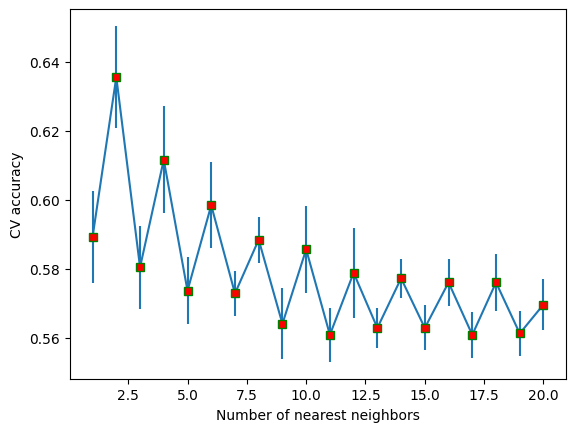

In [38]:
# Feature transformed on the train data
X_train_hog = [hog.compute(x) for x in X_train]
x_train_hog = np.array(X_train_hog)
scaler = MinMaxScaler()
X_train_hog = scaler.fit_transform(X_train_hog)

#select k and plot error bar
k_list = np.arange(1,21)

mean_acc = []
std_acc = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs = -1)
    scores = cross_val_score(knn, X_train_hog, y_train)
    mean_acc.append(scores.mean())
    std_acc.append(scores.std())
    
plt.errorbar(k_list, mean_acc,std_acc, marker = "s", mec = "g", mfc = "r")
plt.xlabel("Number of nearest neighbors")
plt.ylabel("CV accuracy")
plt.show()

In [39]:
# transform X_test and scale it
X_test_hog = [hog.compute(x) for x in X_test]
X_test_hog = np.array(X_test_hog)
X_test_hog = scaler.transform(X_test_hog)

k_opt = k_list[np.argmax(mean_acc)]

start = time.time()
# retrain the knn with all the train data
knn = KNeighborsClassifier(n_neighbors=k_opt, n_jobs=-1)
knn.fit(X_train_hog, y_train)
pred = knn.predict(X_test_hog)
print(f"The execution time of training and prediction:{(time.time() - start):.3f}s.")

The execution time of training and prediction:0.100s.


In [40]:
print(classification_report(y_test, pred, target_names= knn.classes_))

              precision    recall  f1-score   support

         cat       0.66      0.37      0.47       250
         dog       0.56      0.81      0.66       250

    accuracy                           0.59       500
   macro avg       0.61      0.59      0.57       500
weighted avg       0.61      0.59      0.57       500



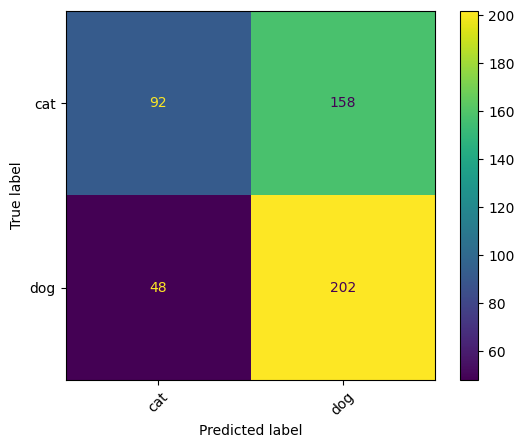

In [41]:
conf_mat = confusion_matrix(y_test, pred)
conf_mat_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=knn.classes_)

conf_mat_display.plot()
plt.xticks(rotation = 45)
plt.show()

In [42]:
knn.classes_

array(['cat', 'dog'], dtype='<U3')